## Objective 03 - apply word embedding models to create document vectors

## Challenge
Using your own list of words, copy the above code and produce a plot. Check the similarity between words on this plot with the `token1.similarity(token2)`. Do similar words lie next to each other?

In [1]:
# Import the library and model
import spacy
nlp = spacy.load('en_core_web_lg')

# Set the document (this example contains two words)
doc = nlp("drama llama")

# Get the vectors for document
# (the vectors are the average of the two word vectors)
llama_vector = doc.vector

# Look length of the vector (how many dimensions?)
print(llama_vector.shape)

# Display part of the vector
print(llama_vector[:10])

(300,)
[-0.04911    -0.23685     0.10623751 -0.19662951 -0.403395    0.238247
  0.1852     -0.28211    -0.31013     1.0560249 ]


In [2]:
# Find the similarity score for example words

# Compare "llama" and "horse"
print("The similarity score for llama-llama is: ", nlp("llama").similarity(nlp("llama")))
print("The similarity score for llama-horse is: ", nlp("llama").similarity(nlp("horse")))
print("The similarity score for llama-car is: ", nlp("llama").similarity(nlp("car")))

The similarity score for llama-llama is:  1.0
The similarity score for llama-horse is:  0.37856930047799736
The similarity score for llama-car is:  0.08994986314497783


In [3]:
# import the PCA module from sklearn
from sklearn.decomposition import PCA

# Define a function to find the vector for a word
def get_word_vectors(words):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]

# Example word list to find vectors for
words = ['python', 'javascript', 'code', 'data', 'linux',
        'llama', 'alpaca', 'cat', 'snake',
        'cook', 'bake', 'cookie', 'clean', 'car']

# Initialize the PCA model and project down to two dimensions
pca = PCA(n_components=2)

# Fit the PCA model on the word list
pca.fit(get_word_vectors(words))

# Apply the transformation learned from the PCA model
word_vecs_2d = pca.transform(get_word_vectors(words))

# Look at the 2-D array (which is just x and y coordinates)
word_vecs_2d

array([[ 2.87538871,  2.1924341 ],
       [ 3.89682021, -0.73923489],
       [ 3.69059896, -1.41344964],
       [ 2.95501969, -1.67204314],
       [ 3.21524274, -0.10002494],
       [-1.79493447,  4.34816682],
       [-2.3407361 ,  4.28495142],
       [-1.45716462,  1.55856908],
       [-0.84419009,  2.45805994],
       [-3.56703596, -2.77326173],
       [-3.87441702, -3.66247474],
       [-1.3833254 , -2.81328086],
       [-0.81738513, -1.28377165],
       [-0.55388151, -0.38463977]])

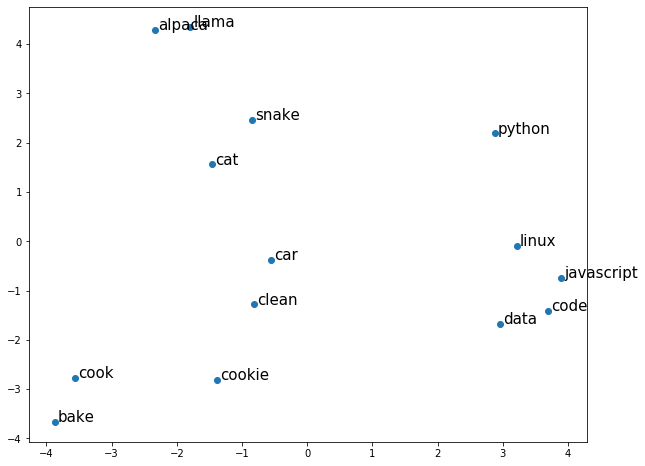

In [4]:
# Imports for plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# Display the text of the word at each point
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x+0.05, y, word, size= 15)

# show the plot
plt.show()